In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [13]:
from pandas import *
import random

In [28]:
class Agent():
    def __init__(self,area):
        self.x=0
        self.y=0
        self.state=0
        # 0 = uninfected
        # 1 = infected
        # 2 = healed/immune
        while(area[self.x][self.y]!=None):
            self.x=random.randint(0,len(area)-1)
            self.y=random.randint(0,len(area[0])-1)
    
    def update(self,area):
        xm=[0,1,0,-1]
        ym=[-1,0,1,0]
        direction=random.randint(0,4)
        tx=self.x+xm[direction]
        ty=self.y+ym[direction]
        if tx<0 or ty<0 or tx>len(area)-1 or ty>len(area)-1:
            pass
        else:
            if self.state==0: #uninfected
                area[self.x][self.y]=None
                self.x=self.x+xm[direction]
                self.y=self.y+ym[direction]
                area[self.x][self.y]=self
            else:
                if self.state==1: #infected
                    if area[tx][ty]!=None:
                        if area[tx][ty].state==0:
                            if random.uniform(0.0,1.0)>0.7:
                                area[tx][ty].state=1
                    else:
                        area[self.x][self.y]=None
                        self.x=self.x+xm[direction]
                        self.y=self.y+ym[direction]
                        area[self.x][self.y]=self
                        if(random.uniform(0.0,1.0)<0.01):
                            self.state=2
                else:
                    if self.state==2:
                        if(random.uniform(0.0,1.0)<0.01):
                            self.state=0


In [29]:
area=[]
image=[]
xDim=100
yDim=100
for i in range(xDim):
    area.append([])
    image.append([])
    for j in range(yDim):
        area[i].append(None)
        image[i].append(0)
        
agents=[]
for i in range(5000):
    A=Agent(area)
    area[A.x][A.y]=A
    agents.append(A)

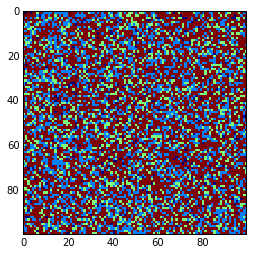

In [77]:
agents[0].state=1
for i in range(500):
    for agent in agents:
        agent.update(area)
for i in range(len(image)):
    for j in range(len(image[0])):
        image[i][j]=4
for agent in agents:
    image[agent.x][agent.y]=agent.state
imshow(image,interpolation='nearest')

In [5]:
def f(a):
    a=a+1
    print a
    
myVar=7
print f(myVar)
print myVar

8
None
7


In [3]:
def l(myList):
    myList[0]=56
    print myList[0]
    
localList=[1,2]
print localList
l(localList)
print localList

[1, 2]
56
[56, 2]


In [47]:
class Agent():
    def __init__(self,area):
        self.state=1 #one means healthy
        self.x=random.randint(0,len(area)-1)
        self.y=random.randint(0,len(area[0])-1)
        while(area[self.x][self.y]!=None):
            self.x=random.randint(0,len(area)-1)
            self.y=random.randint(0,len(area[0])-1)
        area[self.x][self.y]=self
          
    def update(self,area):
        xOffset=[0,1,0,-1]
        yOffset=[-1,0,1,0]
        direction=random.randint(0,4)
        tx=self.x+xOffset[direction]
        ty=self.y+yOffset[direction]
        if tx<0 or ty<0 or tx>len(area)-1 or ty>len(area[0])-1:
            pass
        else:
            if self.state==1: #healthy!
                if area[tx][ty]==None:
                    area[self.x][self.y]=None
                    self.x=tx
                    self.y=ty
                    area[self.x][self.y]=self
            else:
                if self.state==2: #sick
                    if area[tx][ty]!=None:
                        if area[tx][ty].state==1: #healthy victim
                            if random.uniform(0.0,1.0)<0.7:
                                area[tx][ty].state=2 #infected!
                    else:
                        area[self.x][self.y]=None
                        self.x=tx
                        self.y=ty
                        area[self.x][self.y]=self
                    if random.uniform(0.0,1.0)<0.01:
                        self.state=3 #immune!
                else:#immune
                    if random.uniform(0.0,1.0)<0.01:
                        self.state=1 #healthy again!


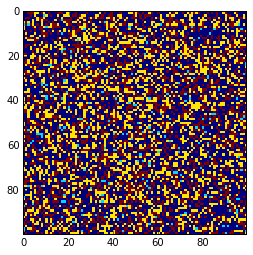

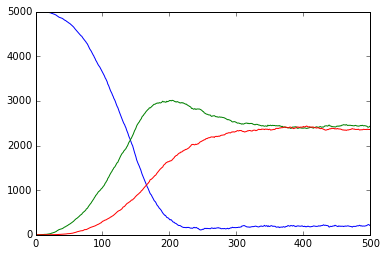

In [49]:
xDim=100
yDim=100

density=0.5
area=list()
image=list()

for x in range(xDim):
    area.append(list())
    image.append(list())
    for y in range(yDim):
        area[x].append(None)
        image[x].append(0)
        
agents=list()
for a in range(int(xDim*yDim*density)):
    agents.append(Agent(area))

agents[0].state=2

data=[[],[],[],[]]
for t in range(500):
    count=[0,0,0,0]
    for agent in agents:
        agent.update(area)
        count[agent.state]=count[agent.state]+1
    for i in range(4):
        data[i].append(count[i])
        
for agent in agents:
    image[agent.x][agent.y]=agent.state
    
imshow(image,interpolation='nearest')
figure()
for i in [1,2,3]:
    plot(data[i])